<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FPD%EF%BC%88%E3%83%87%E3%83%95%E3%82%A9%E3%83%AB%E3%83%88%E3%81%AE%E7%A2%BA%E7%8E%87%EF%BC%89%E3%81%AE%E7%AE%97%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

In [3]:
print(df)

     Default          CI    GDP  Interest_rate  Unemployment_rate_measured
0   0.033419  104.225000  0.386       0.327464                         5.4
1   0.015027  103.208333  0.042       0.092707                         5.3
2   0.008547  108.425000  1.535       0.023512                         4.7
3   0.008119  116.500000  2.186       0.021241                         4.4
4   0.006452  118.825000  1.804       0.023886                         4.1
5   0.010000  123.625000  1.372       0.032943                         3.9
6   0.006297  124.658333  1.484       0.422230                         4.0
7   0.016949  116.158333 -1.224       0.689082                         5.1
8   0.019531   90.525000 -5.693       0.646063                         5.1
9   0.002096  106.950000  4.098       0.222313                         4.6
10  0.007194  108.108333  0.024       0.128445                         4.3
11  0.003850  110.608333  1.375       0.135735                         4.0
12  0.002841  114.441667 

In [4]:
#データ数を20倍にする
import pandas as pd
import numpy as np

# データの読み込み
df = pd.read_csv("/content/drive/MyDrive/sumitomoshintalu_TomoharuKurosu.csv")

# データ拡張
augmented_data = pd.concat([df.copy() + np.random.normal(0, 0.01, size=(df.shape[0], df.shape[1])) for _ in range(19)], ignore_index=True)

# 各列に対してランダムなノイズを追加
for column in df.columns:
    if df[column].dtype == 'object':
        augmented_data[column] = augmented_data[column].astype(float)  # floatに変換
    augmented_data[column] += np.random.normal(0, 0.00001, size=augmented_data.shape[0])

# 拡張後のデータの確認
print(augmented_data.head())


    Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0  0.044580  104.238528  0.412445       0.328802                    5.405219
1  0.002408  103.204289  0.043146       0.077764                    5.285496
2  0.008550  108.418556  1.539667       0.005484                    4.704694
3 -0.005572  116.479173  2.183808       0.025329                    4.414505
4  0.021269  118.834131  1.802627       0.029929                    4.083933


In [5]:
print(augmented_data.head(100))

     Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0   0.044580  104.238528  0.412445       0.328802                    5.405219
1   0.002408  103.204289  0.043146       0.077764                    5.285496
2   0.008550  108.418556  1.539667       0.005484                    4.704694
3  -0.005572  116.479173  2.183808       0.025329                    4.414505
4   0.021269  118.834131  1.802627       0.029929                    4.083933
..       ...         ...       ...            ...                         ...
95 -0.012761  117.059489  0.779863      -0.012500                    2.806218
96 -0.003313  121.680295  1.676282      -0.223681                    2.381631
97 -0.002408  122.265544  0.643435      -0.184127                    2.423050
98  0.010885  116.965868 -0.398709      -0.129035                    2.811965
99  0.021903   99.989689 -4.282690      -0.193825                    2.817818

[100 rows x 5 columns]


In [6]:
#必要なモジュールのインストール
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = augmented_data
print(df)

      Default          CI       GDP  Interest_rate  Unemployment_rate_measured
0    0.044580  104.238528  0.412445       0.328802                    5.405219
1    0.002408  103.204289  0.043146       0.077764                    5.285496
2    0.008550  108.418556  1.539667       0.005484                    4.704694
3   -0.005572  116.479173  2.183808       0.025329                    4.414505
4    0.021269  118.834131  1.802627       0.029929                    4.083933
..        ...         ...       ...            ...                         ...
375 -0.001194  117.069476  0.731140      -0.017134                    2.799183
376  0.010208  121.673839  1.673861      -0.235240                    2.393654
377 -0.009284  122.270536  0.640768      -0.200177                    2.403985
378  0.002644  116.964620 -0.394836      -0.123626                    2.795594
379 -0.007434   99.979042 -4.286378      -0.193594                    2.788593

[380 rows x 5 columns]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 361, number of used features: 4
[LightGBM] [Info] Start training from score 0.008645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

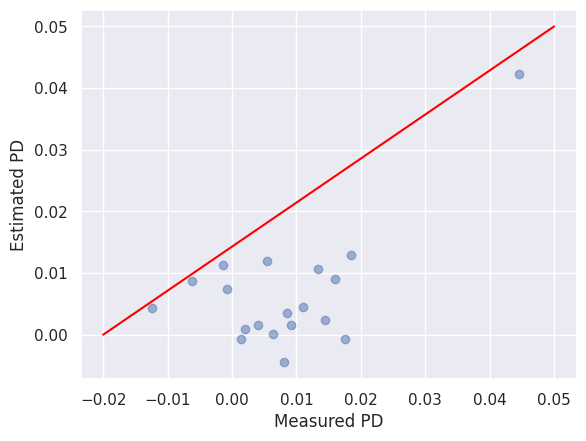

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

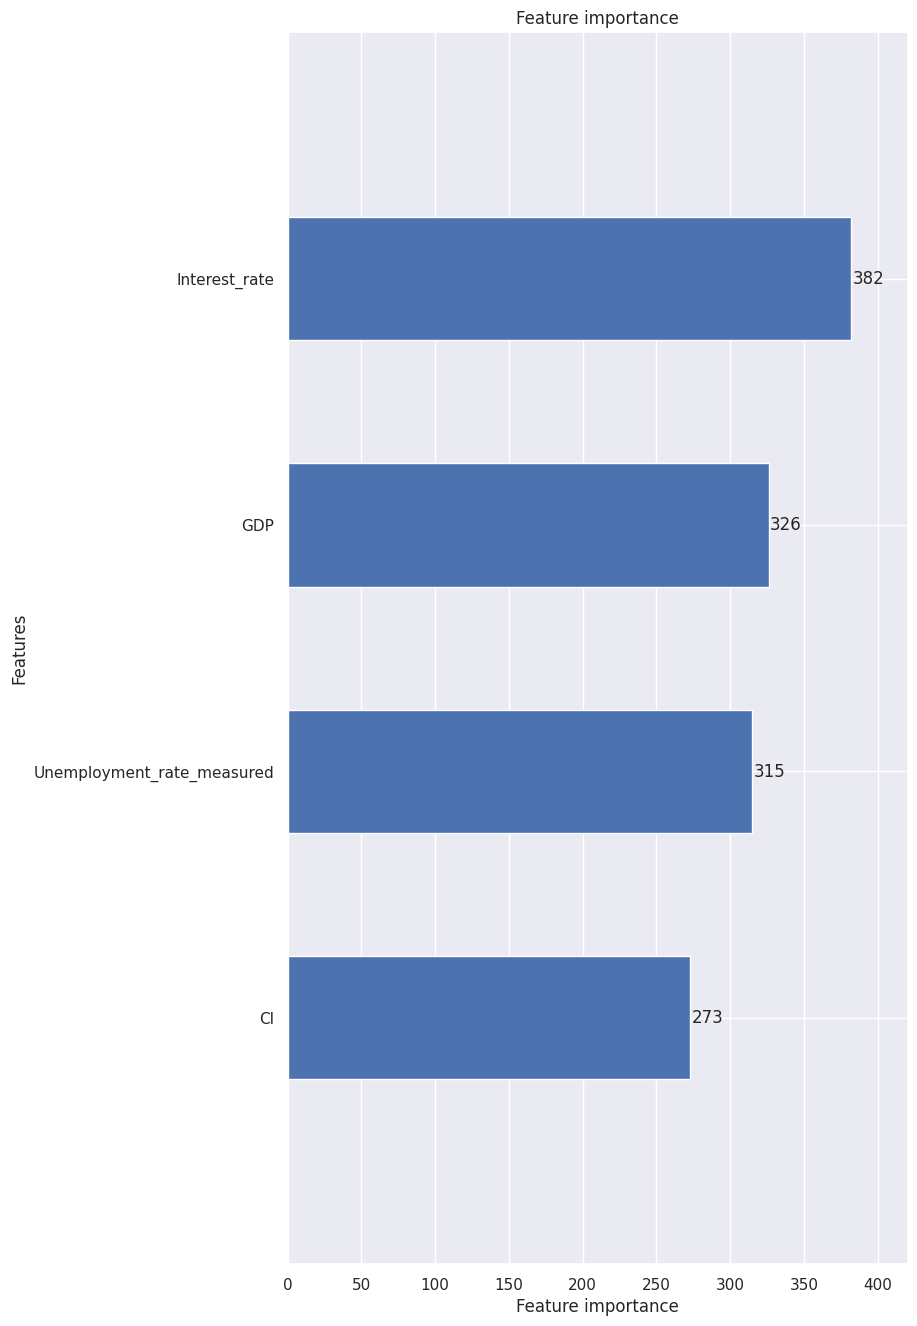

In [17]:
#予測ターゲットの格納（Default：A列）
target_df = df[["Default"]]
#特徴量の格納（説明変数：B列以降）
train_df = df.iloc[:,1:5]

#モデル学習のための、訓練データとテストデータを19:1で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.05)

#lightで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

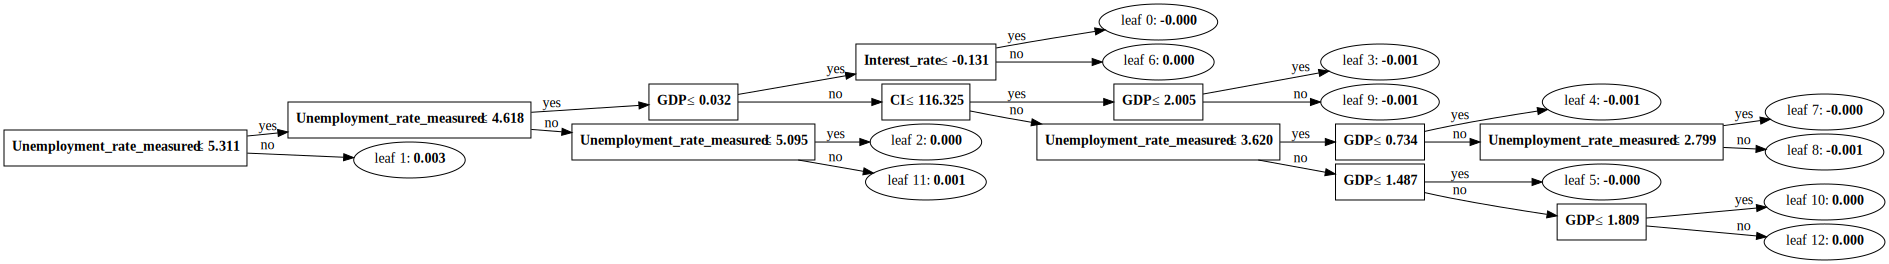

In [9]:
# 決定木の分岐の可視化
lgb.create_tree_digraph(model, 1)

In [18]:
#適当なデータを入れて予測（model.predict([[?,?,?,?,?,?,?,?,?,?,?,?]])）
pred_2024 = model.predict([[113.916666666667,1.302,-0.0990901639344262,1.73043187690688]])
print(pred_2024)




[0.01263493]


In [ ]:
#結果
#[0.00740295]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

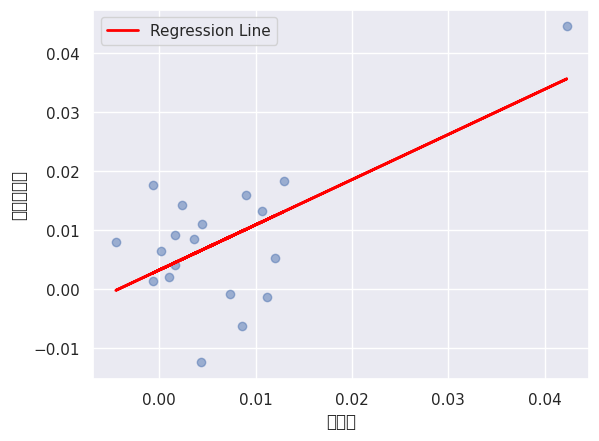

傾き: 0.7662593619672472
切片: 0.0032731164101452385


In [24]:
#これなしでは回る
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pred_Regression = pred

# 実際の価格と予測値の対応する点
x = np.array(pred_Regression).reshape(-1, 1)
y = np.array(y_test).reshape(-1, 1)


# 線形回帰モデルの作成
model2 = LinearRegression()

# モデルの学習
model2.fit(x, y)

# 傾きと切片の取得
slope = model2.coef_[0][0]
intercept = model2.intercept_[0]

# 予測値を使って回帰直線を描写
plt.scatter(x, y, alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Regression Line')
plt.xlabel('予測値')
plt.ylabel('実際の価格')
plt.legend()
plt.show()

print(f"傾き: {slope}")
print(f"切片: {intercept}")


In [32]:
#アドオン  調整中
pred_2024_2 = pred_2024-intercept
pred_2024_3 = pred_2024_2/slope
pred_2024_new = pred_2024_3
print(pred_2024_new)


pred_2 = pred-intercept
pred_3 = pred_2/slope
pred_new = pred_3
print(pred)
#アドオン前の2024年のPD　0.00740295


[0.01221755]
[ 0.01122565  0.01290729  0.00358943  0.00736546  0.00448197  0.04229728
 -0.00066564  0.00898053  0.00434737 -0.00066564  0.00163119  0.00099785
 -0.00449989  0.01068651  0.00018726  0.00161163  0.01198782  0.00235275
  0.00864307]


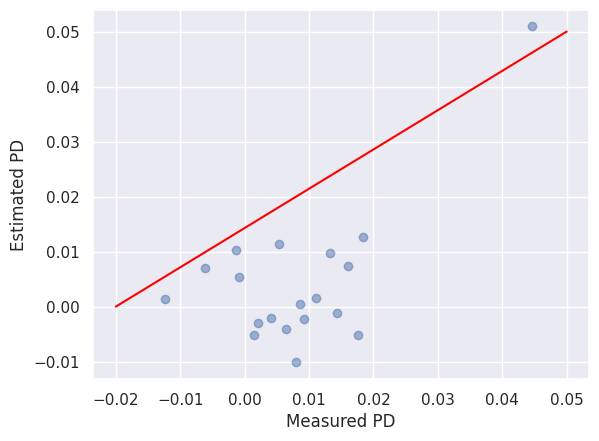

In [34]:
#散布図で予測の精度を描写　調整完了後確認
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred_new, alpha = 0.5)
plt.plot(np.linspace(-0.02, 0.05, 10000), np.linspace(0, 0.05, 10000), "red")
plt.xlabel('Measured PD')
plt.ylabel('Estimated PD')
plt.show()

